In [130]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np

pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',500)
pd.set_option('display.float_format', lambda x: '%.3f' %x)

from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score

 
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Suppressing Warnings 
import warnings
warnings.filterwarnings('ignore')

In [131]:
# Importing dataset
df = pd.read_csv("Leads.csv")
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.000,0,0.000,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.000,15.000,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.000,674,2.500,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.000,15.000,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.000,1532,2.000,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.000,20.000,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.000,305,1.000,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.000,17.000,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.000,1428,1.000,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.000,18.000,No,No,Modified


In [132]:
#check df information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [133]:
#check % of missing values in each column
round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                      0.000
Lead Number                                      0.000
Lead Origin                                      0.000
Lead Source                                      0.390
Do Not Email                                     0.000
Do Not Call                                      0.000
Converted                                        0.000
TotalVisits                                      1.480
Total Time Spent on Website                      0.000
Page Views Per Visit                             1.480
Last Activity                                    1.110
Country                                         26.630
Specialization                                  15.560
How did you hear about X Education              23.890
What is your current occupation                 29.110
What matters most to you in choosing a course   29.320
Search                                           0.000
Magazine                                         0.000
Newspaper 

In [134]:
#check no of unique values
df.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

### Removing the columns having single unique values as it doesn't contain any information and it's column variance is 0

In [135]:
# Removing the columns 'Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque'
df = df.drop(['Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque'], axis = 1)

In [136]:
#removing the rows having more than 11 missing values
out_data = df[df.isnull().sum(axis=1) < 12]

In [137]:
#check % of missing values in each column after dropping the few columns/rows
round(100*(out_data.isnull().sum()/len(out_data.index)), 2)

Prospect ID                                      0.000
Lead Number                                      0.000
Lead Origin                                      0.000
Lead Source                                      0.420
Do Not Email                                     0.000
Do Not Call                                      0.000
Converted                                        0.000
TotalVisits                                      1.590
Total Time Spent on Website                      0.000
Page Views Per Visit                             1.590
Last Activity                                    1.200
Country                                         23.890
Specialization                                   9.240
How did you hear about X Education              18.170
What is your current occupation                 23.790
What matters most to you in choosing a course   24.010
Search                                           0.000
Newspaper Article                                0.000
X Educatio

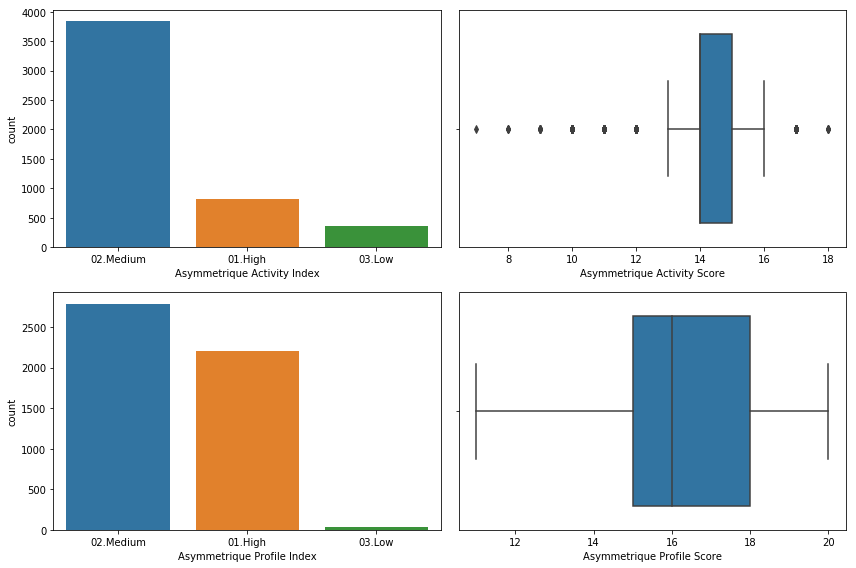

In [138]:
#plotting Asymmetrique Activity Index, Asymmetrique Activity Score, Asymmetrique Profile Index, Asymmetrique Profile Score
fig, axs = plt.subplots(2,2, figsize = (12,8))
plt1 = sns.countplot(out_data['Asymmetrique Activity Index'], ax = axs[0,0])
plt2 = sns.boxplot(out_data['Asymmetrique Activity Score'], ax = axs[0,1])
plt3 = sns.countplot(out_data['Asymmetrique Profile Index'], ax = axs[1,0])
plt4 = sns.boxplot(out_data['Asymmetrique Profile Score'], ax = axs[1,1])
plt.tight_layout()

In [139]:
#removing the Lead Quality, Asymetric Activity Index, Asymmetrique Profile Index, Asymmetrique Activity Score, Asymmetrique Profile Score columns as it has high missing values
out_data = out_data.drop(['Lead Quality', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score'], axis = 1)

### Checking the unique values for categorical column

In [140]:
out_data['Lead Source'].unique()

array(['Olark Chat', 'Organic Search', 'Direct Traffic', 'Google',
       'Referral Sites', 'Welingak Website', 'Reference', 'google',
       'Facebook', nan, 'blog', 'Pay per Click Ads', 'bing',
       'Social Media', 'WeLearn', 'Click2call', 'Live Chat',
       'welearnblog_Home', 'youtubechannel', 'testone', 'Press_Release',
       'NC_EDM'], dtype=object)

### Here Google is mis-spelled as google so we will change google with Google

In [141]:
out_data.loc[out_data['Lead Source'] == 'google', 'Lead Source'] = 'Google'

In [142]:
out_data['Country'].unique()

array([nan, 'India', 'Russia', 'Kuwait', 'Oman', 'United Arab Emirates',
       'United States', 'Australia', 'United Kingdom', 'Bahrain', 'Ghana',
       'Singapore', 'Qatar', 'Saudi Arabia', 'Belgium', 'France',
       'Sri Lanka', 'China', 'Canada', 'Netherlands', 'Sweden', 'Nigeria',
       'Hong Kong', 'Germany', 'Uganda', 'Kenya', 'South Africa',
       'Tanzania', 'Malaysia', 'Liberia', 'Italy', 'Switzerland',
       'unknown', 'Denmark', 'Philippines', 'Bangladesh', 'Vietnam',
       'Indonesia', 'Asia/Pacific Region'], dtype=object)

In [143]:
#checking the columns having null values in country column and city as Mumbai, Thane & Outskirts and Other Cities of Maharashtra
out_data[ ((out_data['Country'].isnull()) & ((out_data['City']=='Mumbai') | (out_data['City']=='Thane & Outskirts') | (out_data['City']=='Other Cities of Maharashtra')))]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,Lead Profile,City,A free copy of Mastering The Interview,Last Notable Activity
50,2def8175-7a88-405a-a932-669cacf60230,660087,API,Olark Chat,No,No,1,0.000,0,0.000,Email Opened,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Potential Lead,Thane & Outskirts,No,Modified
67,34571884-9e2f-404c-bc30-d5e09309b06a,659849,API,Olark Chat,No,No,1,0.000,0,0.000,Email Opened,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Potential Lead,Other Cities of Maharashtra,No,Modified
79,3a0ce10f-d2c1-4213-a2bc-4f97bcd29699,659710,Lead Add Form,Reference,No,No,1,nan,705,nan,NaN,NaN,Hospitality Management,Select,Working Professional,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Potential Lead,Thane & Outskirts,No,Modified
88,68f496c2-0073-470f-9c3c-7fb48f060ce5,659631,Lead Add Form,Reference,No,No,1,nan,1007,nan,NaN,NaN,Human Resource Management,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,Closed by Horizzon,Lateral Student,Mumbai,No,Modified
137,d76f5ba7-b432-43b5-8dda-aad9fded162e,659141,Lead Add Form,Reference,No,No,1,0.000,0,0.000,Email Opened,NaN,Hospitality Management,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,Closed by Horizzon,Potential Lead,Thane & Outskirts,No,Modified
174,70c71ff4-5848-46da-b501-2e9867c46c06,658675,Lead Add Form,Reference,No,No,1,0.000,0,0.000,Email Opened,NaN,Finance Management,Select,Working Professional,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Potential Lead,Mumbai,No,Email Opened
177,3b74e995-4407-44de-9e59-622afb514261,658648,Lead Add Form,Welingak Website,No,No,1,nan,1240,nan,NaN,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,Closed by Horizzon,Potential Lead,Mumbai,No,Modified
187,80da9389-fc0b-45f7-87eb-96cbbf5eef22,658561,Lead Add Form,Reference,No,No,1,0.000,0,0.000,Unreachable,NaN,Retail Management,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,Closed by Horizzon,Potential Lead,Mumbai,No,Modified
205,487eb109-5611-48e2-8225-470e6dd51866,658309,Lead Add Form,Reference,No,No,1,0.000,0,0.000,Email Opened,NaN,Finance Management,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Potential Lead,Other Cities of Maharashtra,No,Email Opened
255,0e03892b-a2de-4246-8f74-c1ce2796dc59,657731,Landing Page Submission,Direct Traffic,No,No,1,1.000,891,1.000,Converted to Lead,NaN,Operations Management,Select,Student,Better Career Prospects,No,No,No,No,No,No,Lost to EINS,Potential Lead,Other Cities of Maharashtra,Yes,Modified


In [144]:
out_data[ ((out_data['Country'].isnull()) & ((out_data['City']=='Mumbai') | (out_data['City']=='Thane & Outskirts') | (out_data['City']=='Other Cities of Maharashtra')))].shape

(334, 27)

In [145]:
#checking the columns having country not equal to India and city as Mumbai, Thane & Outskirts and Other Cities of Maharashtra
out_data[(((out_data['City']=='Mumbai') | (out_data['City']=='Thane & Outskirts') | (out_data['City']=='Other Cities of Maharashtra')) & (out_data['Country'] != 'India')) ]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,Lead Profile,City,A free copy of Mastering The Interview,Last Notable Activity
50,2def8175-7a88-405a-a932-669cacf60230,660087,API,Olark Chat,No,No,1,0.000,0,0.000,Email Opened,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Potential Lead,Thane & Outskirts,No,Modified
67,34571884-9e2f-404c-bc30-d5e09309b06a,659849,API,Olark Chat,No,No,1,0.000,0,0.000,Email Opened,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Potential Lead,Other Cities of Maharashtra,No,Modified
79,3a0ce10f-d2c1-4213-a2bc-4f97bcd29699,659710,Lead Add Form,Reference,No,No,1,nan,705,nan,NaN,NaN,Hospitality Management,Select,Working Professional,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Potential Lead,Thane & Outskirts,No,Modified
87,0fc49a08-63d2-4fef-98c1-244bfd6d12a9,659644,Landing Page Submission,Direct Traffic,No,No,0,6.000,97,3.000,Email Opened,Kuwait,Supply Chain Management,NaN,NaN,NaN,No,No,No,No,No,No,NaN,NaN,Mumbai,Yes,Email Opened
88,68f496c2-0073-470f-9c3c-7fb48f060ce5,659631,Lead Add Form,Reference,No,No,1,nan,1007,nan,NaN,NaN,Human Resource Management,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,Closed by Horizzon,Lateral Student,Mumbai,No,Modified
103,95f1c454-9f9a-40ef-b521-6fc791f103fb,659469,Landing Page Submission,Direct Traffic,No,No,0,2.000,638,2.000,Page Visited on Website,Oman,Healthcare Management,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,switched off,Select,Mumbai,Yes,Modified
137,d76f5ba7-b432-43b5-8dda-aad9fded162e,659141,Lead Add Form,Reference,No,No,1,0.000,0,0.000,Email Opened,NaN,Hospitality Management,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,Closed by Horizzon,Potential Lead,Thane & Outskirts,No,Modified
174,70c71ff4-5848-46da-b501-2e9867c46c06,658675,Lead Add Form,Reference,No,No,1,0.000,0,0.000,Email Opened,NaN,Finance Management,Select,Working Professional,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Potential Lead,Mumbai,No,Email Opened
177,3b74e995-4407-44de-9e59-622afb514261,658648,Lead Add Form,Welingak Website,No,No,1,nan,1240,nan,NaN,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,Closed by Horizzon,Potential Lead,Mumbai,No,Modified
187,80da9389-fc0b-45f7-87eb-96cbbf5eef22,658561,Lead Add Form,Reference,No,No,1,0.000,0,0.000,Unreachable,NaN,Retail Management,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,Closed by Horizzon,Potential Lead,Mumbai,No,Modified


In [146]:
#checking the columns having country not equal to India and city as Mumbai, Thane & Outskirts and Other Cities of Maharashtra
out_data[(((out_data['City']=='Mumbai') | (out_data['City']=='Thane & Outskirts') | (out_data['City']=='Other Cities of Maharashtra')) & (out_data['Country'] != 'India')) ].shape

(471, 27)

In [147]:
#We will remove city column as there is lots of default values present in it
out_data = out_data.drop(['City'], axis = 1)

In [148]:
out_data['Country'].value_counts()

India                   6265
United States             65
United Arab Emirates      52
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
Kuwait                     4
South Africa               4
Nigeria                    4
Canada                     4
Germany                    4
Sweden                     3
Bangladesh                 2
Philippines                2
Uganda                     2
Belgium                    2
Netherlands                2
unknown                    2
Ghana                      2
China                      2
Liberia                    1
Tanzania                   1
Russia                     1
Malaysia                   1
Denmark                    1
Asia/Pacific Region        1
Italy                      1
Vietnam                    1
Kenya         

In [149]:
#We can see the majority of rows belong to the country India so we will impute the null values with India
out_data['Country']=out_data['Country'].fillna('India')

In [150]:
out_data.reset_index(inplace = True)

In [151]:
#As all the other countries are very less in number, we will club them as other countries
out_data['Country']=['India' if out_data['Country'][i]=='India' else 'Others' for i in range(0,out_data.shape[0])]

In [152]:
out_data[out_data['Country']=='Others'].shape

(277, 27)

In [153]:
#check % of missing values in each column after dropping the few columns/rows
round(100*(out_data.isnull().sum()/len(out_data.index)), 2)

index                                            0.000
Prospect ID                                      0.000
Lead Number                                      0.000
Lead Origin                                      0.000
Lead Source                                      0.420
Do Not Email                                     0.000
Do Not Call                                      0.000
Converted                                        0.000
TotalVisits                                      1.590
Total Time Spent on Website                      0.000
Page Views Per Visit                             1.590
Last Activity                                    1.200
Country                                          0.000
Specialization                                   9.240
How did you hear about X Education              18.170
What is your current occupation                 23.790
What matters most to you in choosing a course   24.010
Search                                           0.000
Newspaper 

In [154]:
out_data.head()

,index,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,Lead Profile,A free copy of Mastering The Interview,Last Notable Activity
0,0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.000,0,0.000,Page Visited on Website,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,Interested in other courses,Select,No,Modified
1,1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.000,674,2.500,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,Select,No,Email Opened
2,2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.000,1532,2.000,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Potential Lead,Yes,Email Opened
3,3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.000,305,1.000,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,Select,No,Modified
4,4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.000,1428,1.000,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Select,No,Modified


In [155]:
out_data['Do Not Email'].value_counts()

No     7909
Yes     686
Name: Do Not Email, dtype: int64

In [156]:
print(out_data['Do Not Call'].value_counts())
print(out_data['Search'].value_counts())
print(out_data['Newspaper Article'].value_counts())
print(out_data['X Education Forums'].value_counts())
print(out_data['Newspaper'].value_counts())
print(out_data['Digital Advertisement'].value_counts())
print(out_data['Through Recommendations'].value_counts())
print(out_data['A free copy of Mastering The Interview'].value_counts())

No     8593
Yes       2
Name: Do Not Call, dtype: int64
No     8581
Yes      14
Name: Search, dtype: int64
No     8593
Yes       2
Name: Newspaper Article, dtype: int64
No     8594
Yes       1
Name: X Education Forums, dtype: int64
No     8594
Yes       1
Name: Newspaper, dtype: int64
No     8591
Yes       4
Name: Digital Advertisement, dtype: int64
No     8588
Yes       7
Name: Through Recommendations, dtype: int64
No     5708
Yes    2887
Name: A free copy of Mastering The Interview, dtype: int64


In [157]:
#we can drop the column do not call, search, Newspaper article,X Education Forums, Newspaper, Digital Advertisement,Through Recommendations as these have negligible rows of yes and contains very less information 
out_data =  out_data.drop(['Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations'], axis = 1)

In [158]:
#Converting categorical variables to binary number
out_data['Do Not Email'] = out_data['Do Not Email'].map({'Yes':1, 'No':0})
out_data['A free copy of Mastering The Interview'] = out_data['A free copy of Mastering The Interview'].map({'Yes':1, 'No':0})

In [159]:
out_data.head()

,index,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Tags,Lead Profile,A free copy of Mastering The Interview,Last Notable Activity
0,0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0.000,0,0.000,Page Visited on Website,India,Select,Select,Unemployed,Better Career Prospects,Interested in other courses,Select,0,Modified
1,1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,5.000,674,2.500,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,Ringing,Select,0,Email Opened
2,2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,1,2.000,1532,2.000,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,Will revert after reading the email,Potential Lead,1,Email Opened
3,3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,1.000,305,1.000,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,Ringing,Select,0,Modified
4,4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,1,2.000,1428,1.000,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,Will revert after reading the email,Select,0,Modified


In [160]:
#check % of missing values in each column after dropping the few columns/rows
round(100*(out_data.isnull().sum()/len(out_data.index)), 2)

index                                            0.000
Prospect ID                                      0.000
Lead Number                                      0.000
Lead Origin                                      0.000
Lead Source                                      0.420
Do Not Email                                     0.000
Converted                                        0.000
TotalVisits                                      1.590
Total Time Spent on Website                      0.000
Page Views Per Visit                             1.590
Last Activity                                    1.200
Country                                          0.000
Specialization                                   9.240
How did you hear about X Education              18.170
What is your current occupation                 23.790
What matters most to you in choosing a course   24.010
Tags                                            31.530
Lead Profile                                    24.010
A free cop

In [161]:
out_data.shape

(8595, 20)

In [162]:
out_data['Lead Origin'].value_counts()

Landing Page Submission    4870
API                        2951
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

In [163]:
#Clubbing the values which has less count
ld_src=out_data['Lead Origin'].value_counts()<100
ld_src=ld_src.reset_index()
lst=list(ld_src[ld_src['Lead Origin']==True]['index'])
out_data['Lead Origin']=out_data['Lead Origin'].replace(lst,'Others')
print(out_data['Lead Origin'].value_counts())

Landing Page Submission    4870
API                        2951
Lead Add Form               718
Others                       56
Name: Lead Origin, dtype: int64


In [164]:
out_data['Lead Source'].value_counts()

Google               2716
Direct Traffic       2514
Olark Chat           1348
Organic Search       1106
Reference             534
Welingak Website      142
Referral Sites        124
Facebook               55
Click2call              4
bing                    3
Press_Release           2
Live Chat               2
Social Media            2
WeLearn                 1
youtubechannel          1
blog                    1
testone                 1
welearnblog_Home        1
NC_EDM                  1
Pay per Click Ads       1
Name: Lead Source, dtype: int64

In [165]:
#Clubbing the values which has less count
ld_src=out_data['Lead Source'].value_counts()<100
ld_src=ld_src.reset_index()
lst=list(ld_src[ld_src['Lead Source']==True]['index'])
out_data['Lead Source']=out_data['Lead Source'].replace(lst,'Others')
print(out_data['Lead Source'].value_counts())

Google              2716
Direct Traffic      2514
Olark Chat          1348
Organic Search      1106
Reference            534
Welingak Website     142
Referral Sites       124
Others                75
Name: Lead Source, dtype: int64


In [166]:
out_data['Last Activity'].value_counts()

Email Opened                    3249
SMS Sent                        2633
Olark Chat Conversation          756
Page Visited on Website          597
Converted to Lead                392
Email Bounced                    305
Email Link Clicked               247
Form Submitted on Website        115
Unreachable                       91
Unsubscribed                      57
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

In [167]:
#Clubbing the values which has less count
ld_src=out_data['Last Activity'].value_counts()<100
ld_src=ld_src.reset_index()
lst=list(ld_src[ld_src['Last Activity']==True]['index'])
out_data['Last Activity']=out_data['Last Activity'].replace(lst,'Others')
print(out_data['Last Activity'].value_counts())

Email Opened                 3249
SMS Sent                     2633
Olark Chat Conversation       756
Page Visited on Website       597
Converted to Lead             392
Email Bounced                 305
Email Link Clicked            247
Others                        198
Form Submitted on Website     115
Name: Last Activity, dtype: int64


In [168]:
out_data['Specialization'].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  837
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [169]:
round((1939/len(out_data.index)),2)

0.23

In [170]:
#Clubbing the values which has less count
out_data['Specialization']=out_data['Specialization'].replace(['Select'],'Others')
print(out_data['Specialization'].value_counts())

Others                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  837
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64


In [171]:
out_data['How did you hear about X Education'].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [172]:
round((4961/len(out_data.index)),2)

0.58

In [173]:
#dropping thic column as it has almost 60% missing values
out_data = out_data.drop(['How did you hear about X Education'], axis = 1)

In [174]:
out_data['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [175]:
out_data[(out_data['What is your current occupation'].isnull()) &  (out_data['Specialization'] == 'Others')]

,index,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Tags,Lead Profile,A free copy of Mastering The Interview,Last Notable Activity
143,143,2b5fb07b-5930-4e1f-a1f6-21f8a333ee2c,659094,Landing Page Submission,Google,0,0,7.000,106,3.500,Page Visited on Website,India,Others,NaN,NaN,NaN,NaN,0,Modified
237,237,7292063e-29d8-49e3-be44-f50008df769f,657971,Landing Page Submission,Google,0,0,5.000,306,5.000,Page Visited on Website,India,Others,NaN,NaN,NaN,NaN,0,Modified
280,280,bad47819-f767-4475-8e30-65cb7509a164,657426,Landing Page Submission,Google,0,0,5.000,1008,5.000,Page Visited on Website,India,Others,NaN,NaN,NaN,NaN,0,Modified
2384,2386,013a035d-72c5-4277-be61-27550621c4d2,636809,Landing Page Submission,Google,0,0,7.000,1072,3.500,Others,India,Others,NaN,NaN,NaN,NaN,0,Modified
2586,2588,d79b92a9-9efd-4033-bc92-d94d639a7fe4,634699,Landing Page Submission,Google,1,0,4.000,288,4.000,SMS Sent,India,Others,NaN,NaN,NaN,NaN,0,Modified
4020,4288,336622da-91ef-4804-bcfc-0a1bac398c51,618782,Landing Page Submission,Direct Traffic,0,1,10.000,744,2.000,SMS Sent,India,Others,NaN,NaN,NaN,NaN,0,SMS Sent
4832,5265,4f6ae4d8-9547-4a6c-963f-96777240c2cf,609409,Landing Page Submission,Direct Traffic,0,0,5.000,420,5.000,Converted to Lead,India,Others,NaN,NaN,NaN,NaN,0,Modified
4846,5279,c819680c-20c9-40fa-8acb-1ac8bd9a6cb7,609296,Landing Page Submission,Direct Traffic,1,0,2.000,195,2.000,Email Bounced,India,Others,NaN,NaN,NaN,NaN,0,Modified
4938,5381,c27e7e2b-5a82-404f-b267-e1d1b02cef4a,608567,Landing Page Submission,Referral Sites,1,0,7.000,259,2.330,Email Bounced,India,Others,NaN,NaN,NaN,NaN,0,Modified
5077,5538,b978e9bb-8960-4d23-b7e4-4db879f05a6c,607470,Landing Page Submission,Referral Sites,0,0,54.000,1280,4.500,SMS Sent,India,Others,NaN,NaN,NaN,NaN,0,SMS Sent


In [176]:
#replacing Houswife and Businessman with others as it has very low values
out_data['What is your current occupation']=out_data['What is your current occupation'].replace(['Housewife', 'Businessman', 'Other'],'Others')
print(out_data['What is your current occupation'].value_counts())

Unemployed              5600
Working Professional     706
Student                  210
Others                    34
Name: What is your current occupation, dtype: int64


In [177]:
out_data['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [178]:
#dropping above column as it doesn't contain any information and imputing which will create a bias
out_data = out_data.drop(['What matters most to you in choosing a course'], axis = 1)

In [179]:
out_data['Tags'].value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          173
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [180]:
#Clubbing the values which has less count
ld_src=out_data['Tags'].value_counts()<100
ld_src=ld_src.reset_index()
lst=list(ld_src[ld_src['Tags']==True]['index'])
out_data['Tags']=out_data['Tags'].replace(lst,'Others')
print(out_data['Tags'].value_counts())

Will revert after reading the email    2072
Ringing                                1203
Interested in other courses             513
Already a student                       465
Closed by Horizzon                      358
Others                                  302
switched off                            240
Busy                                    186
Lost to EINS                            173
Not doing further education             145
Interested  in full time MBA            117
Graduation in progress                  111
Name: Tags, dtype: int64


In [181]:
out_data['Lead Profile'].value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [182]:
round((4090/len(out_data.index)),2)

0.48

In [183]:
#dropping above column as it has around 50% missing values and imputing which will create a bias
out_data = out_data.drop(['Lead Profile'], axis = 1) 

In [184]:
out_data['Last Notable Activity'].value_counts()

Modified                        3095
Email Opened                    2681
SMS Sent                        2081
Page Visited on Website          287
Email Link Clicked               159
Olark Chat Conversation          139
Email Bounced                     60
Unsubscribed                      43
Unreachable                       30
Had a Phone Conversation          14
Email Marked Spam                  2
Form Submitted on Website          1
Email Received                     1
View in browser link Clicked       1
Approached upfront                 1
Name: Last Notable Activity, dtype: int64

In [185]:
#Clubbing the values which has less count
ld_src=out_data['Last Notable Activity'].value_counts()<100
ld_src=ld_src.reset_index()
lst=list(ld_src[ld_src['Last Notable Activity']==True]['index'])
out_data['Last Notable Activity']=out_data['Last Notable Activity'].replace(lst,'Others')
print(out_data['Last Notable Activity'].value_counts())

Modified                   3095
Email Opened               2681
SMS Sent                   2081
Page Visited on Website     287
Email Link Clicked          159
Others                      153
Olark Chat Conversation     139
Name: Last Notable Activity, dtype: int64


In [186]:
#check % of missing values in each column after dropping the few columns/rows
round(100*(out_data.isnull().sum()/len(out_data.index)), 2)

index                                     0.000
Prospect ID                               0.000
Lead Number                               0.000
Lead Origin                               0.000
Lead Source                               0.420
Do Not Email                              0.000
Converted                                 0.000
TotalVisits                               1.590
Total Time Spent on Website               0.000
Page Views Per Visit                      1.590
Last Activity                             1.200
Country                                   0.000
Specialization                            9.240
What is your current occupation          23.790
Tags                                     31.530
A free copy of Mastering The Interview    0.000
Last Notable Activity                     0.000
dtype: float64

In [187]:
#Removing the tags column as it has 30% missing values
out_data = out_data.drop(['Tags'], axis = 1)

In [188]:
out_data.shape

(8595, 16)

In [189]:
out_data['What is your current occupation'].isnull().sum()

2045

In [190]:
#removing the rows having null values in current occupation
out_data = out_data.dropna(subset = ['What is your current occupation'])

In [191]:
#check % of missing values in each column after dropping the few columns/rows
round(100*(out_data.isnull().sum()/len(out_data.index)), 2)

index                                    0.000
Prospect ID                              0.000
Lead Number                              0.000
Lead Origin                              0.000
Lead Source                              0.550
Do Not Email                             0.000
Converted                                0.000
TotalVisits                              1.980
Total Time Spent on Website              0.000
Page Views Per Visit                     1.980
Last Activity                            1.570
Country                                  0.000
Specialization                           0.270
What is your current occupation          0.000
A free copy of Mastering The Interview   0.000
Last Notable Activity                    0.000
dtype: float64

In [192]:
out_data.shape

(6550, 16)

In [193]:
out_data.loc[:, ['TotalVisits', 'Page Views Per Visit']].describe()

,TotalVisits,Page Views Per Visit
count,6420.000,6420.000
mean,3.604,2.467
std,5.037,2.167
min,0.000,0.000
25%,1.000,1.000
50%,3.000,2.000
75%,5.000,3.500
max,251.000,55.000


In [194]:
out_data.loc[:, ['TotalVisits', 'Page Views Per Visit']].median()

TotalVisits            3.000
Page Views Per Visit   2.000
dtype: float64

In [195]:
#Imputing the columns TotalVisits, Page Views Per Visit with median 
out_data.loc[np.isnan(out_data['TotalVisits']), ['TotalVisits']] = out_data['TotalVisits'].median()
out_data.loc[np.isnan(out_data['Page Views Per Visit']), ['Page Views Per Visit']] = out_data['Page Views Per Visit'].median()

In [196]:
# removing the rows having missing values in column Lead Source, Last Activity, and Specialization 
out_data = out_data.dropna(subset = ['Lead Source', 'Last Activity', 'Specialization'])

In [197]:
#check % of missing values in each column after dropping the few columns/rows
round(100*(out_data.isnull().sum()/len(out_data.index)), 2)

index                                    0.000
Prospect ID                              0.000
Lead Number                              0.000
Lead Origin                              0.000
Lead Source                              0.000
Do Not Email                             0.000
Converted                                0.000
TotalVisits                              0.000
Total Time Spent on Website              0.000
Page Views Per Visit                     0.000
Last Activity                            0.000
Country                                  0.000
Specialization                           0.000
What is your current occupation          0.000
A free copy of Mastering The Interview   0.000
Last Notable Activity                    0.000
dtype: float64

Now we have all the data present in our dataset

## EDA

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

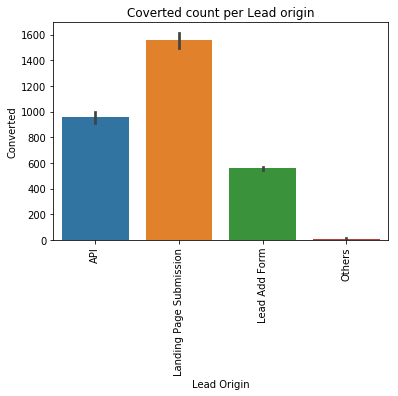

In [198]:
sns.barplot(x=out_data['Lead Origin'], y=out_data['Converted'],estimator=sum)
plt.title('Coverted count per Lead origin')
plt.xticks(rotation=90)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

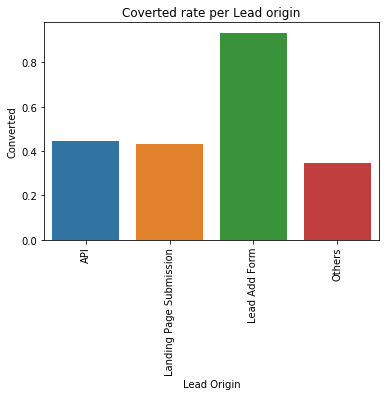

In [199]:
grp=out_data.groupby(['Lead Origin'])['Converted'].agg('sum')
grp1=out_data.groupby(['Lead Origin'])['Converted'].agg('count')
rat=grp/grp1
rat=rat.reset_index()


sns.barplot(x=rat['Lead Origin'], y=rat['Converted'])
plt.title('Coverted rate per Lead origin')
plt.xticks(rotation=90)

### This shows that the leads from Add form have the highest conversion rate

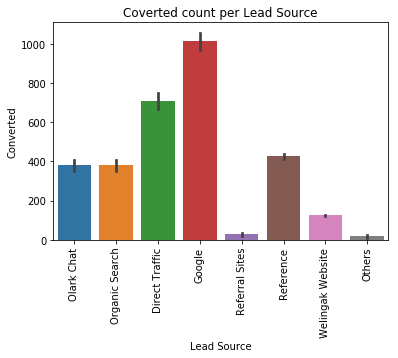

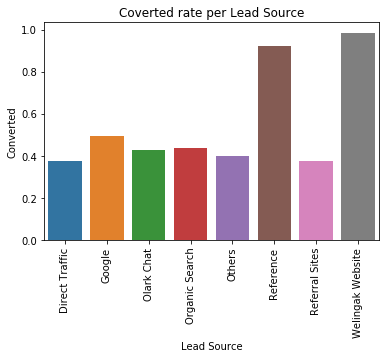

In [200]:
grp=out_data.groupby(['Lead Source'])['Converted'].agg('sum')
grp1=out_data.groupby(['Lead Source'])['Converted'].agg('count')
rat=grp/grp1
rat=rat.reset_index()

sns.barplot(x=out_data['Lead Source'], y=out_data['Converted'],estimator=sum)
plt.title('Coverted count per Lead Source')
plt.xticks(rotation=90)
plt.show()

sns.barplot(x=rat['Lead Source'], y=rat['Converted'])
plt.title('Coverted rate per Lead Source')
plt.xticks(rotation=90)
plt.show()

### This shows that  although the largest count of applications come through google, the highest conversion rate is of leads from Wellington website followed by references

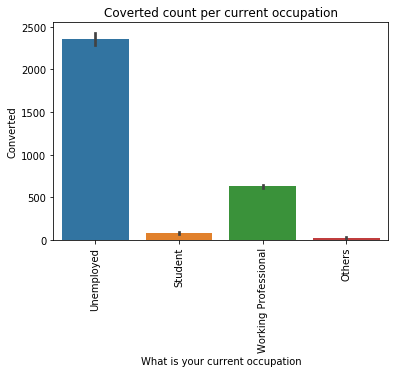

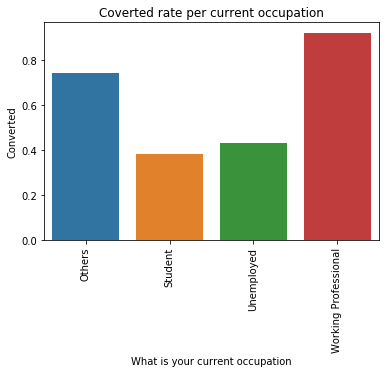

In [201]:
grp=out_data.groupby(['What is your current occupation'])['Converted'].agg('sum')
grp1=out_data.groupby(['What is your current occupation'])['Converted'].agg('count')
rat=grp/grp1
rat=rat.reset_index()

sns.barplot(x=out_data['What is your current occupation'], y=out_data['Converted'],estimator=sum)
plt.title('Coverted count per current occupation')
plt.xticks(rotation=90)
plt.show()

sns.barplot(x=rat['What is your current occupation'], y=rat['Converted'])
plt.title('Coverted rate per current occupation')
plt.xticks(rotation=90)
plt.show()

### Conversion rate of working professionals is higher than others which also includes housewives and business men

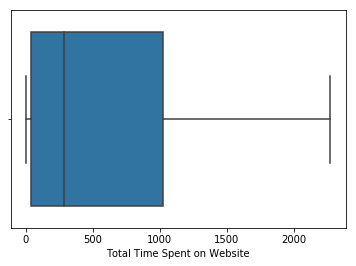

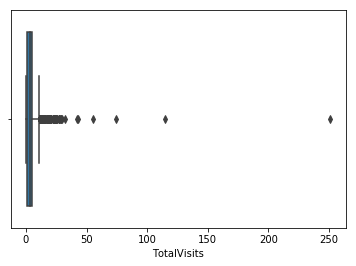

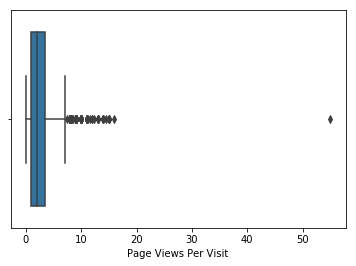

In [202]:
# lets create box plots for numeric variables
sns.boxplot(out_data['Total Time Spent on Website'])
plt.show()
sns.boxplot(out_data['TotalVisits'])
plt.show()
sns.boxplot(out_data['Page Views Per Visit'])

plt.show()


In [203]:
out_data[['Total Time Spent on Website','TotalVisits','Page Views Per Visit']].describe(percentiles = [0.05, 0.25, 0.5, 0.75, 0.95])

,Total Time Spent on Website,TotalVisits,Page Views Per Visit
count,6395.000,6395.000,6395.000
mean,536.396,3.622,2.479
std,565.648,5.040,2.164
min,0.000,0.000,0.000
5%,0.000,0.000,0.000
25%,35.000,1.000,1.000
50%,288.000,3.000,2.000
75%,1025.000,5.000,3.500
95%,1595.000,10.000,6.000
max,2272.000,251.000,55.000


### From the above table we can observe that the data is heavily skewed for TotalVisits and Page Views Per Visit column and there are outliers present in the data so we will impute the outliers with 95th percentile values

In [204]:
# lets try to cap the outliers with 95% values

#impute TotalVisits column
Q3 = out_data['TotalVisits'].quantile(0.95)
out_data['TotalVisits'] = np.where((out_data['TotalVisits'] >=Q3), Q3, out_data['TotalVisits'])

Q3 = out_data['Page Views Per Visit'].quantile(0.95)
out_data['Page Views Per Visit'] = np.where((out_data['Page Views Per Visit'] >=Q3), Q3, out_data['Page Views Per Visit'])

In [205]:
out_data[['Total Time Spent on Website','TotalVisits','Page Views Per Visit']].describe(percentiles = [0.05, 0.25, 0.5, 0.75, 0.95])

,Total Time Spent on Website,TotalVisits,Page Views Per Visit
count,6395.000,6395.000,6395.000
mean,536.396,3.334,2.371
std,565.648,2.777,1.775
min,0.000,0.000,0.000
5%,0.000,0.000,0.000
25%,35.000,1.000,1.000
50%,288.000,3.000,2.000
75%,1025.000,5.000,3.500
95%,1595.000,10.000,6.000
max,2272.000,10.000,6.000


In [206]:
out_data.shape

(6395, 16)

In [207]:
#dropping the prospect id column
out_data = out_data.drop(['Prospect ID'], axis = 1)

## Create dummy variables for multi level categorical variables

In [208]:
# Creating a dummy variable for the variable 'Lead Origin' and dropping the first one.
lo = pd.get_dummies(out_data['Lead Origin'],prefix='Lead Origin',drop_first=True)
#Adding the results to the master dataframe
out_data = pd.concat([out_data,lo],axis=1)

# Creating a dummy variable for the variable 'Lead Source' and dropping the first one.
ls = pd.get_dummies(out_data['Lead Source'],prefix='Lead Source',drop_first=True)
#Adding the results to the master dataframe
out_data = pd.concat([out_data,ls],axis=1)

# Creating a dummy variable for the variable 'Last Activity' and dropping the first one.
la = pd.get_dummies(out_data['Last Activity'],prefix='Last Activity',drop_first=True)
#Adding the results to the master dataframe
out_data = pd.concat([out_data,la],axis=1)

# Creating a dummy variable for the variable 'Country' and dropping the first one.
coun = pd.get_dummies(out_data['Country'],prefix='Country', drop_first=True)
#Adding the results to the master dataframe
out_data = pd.concat([out_data,coun],axis=1)

# Creating a dummy variable for the variable 'Specialization' and dropping the first one.
spl = pd.get_dummies(out_data['Specialization'],prefix='Specialization',drop_first=True)
#Adding the results to the master dataframe
out_data = pd.concat([out_data,spl],axis=1)

# Creating a dummy variable for the variable 'What is your current occupation'.
co =pd.get_dummies(out_data['What is your current occupation'],prefix='What is your current occupation',drop_first=True)
#Adding the results to the master dataframe
out_data = pd.concat([out_data,co],axis=1)

# Creating a dummy variable for the variable 'Last Notable Activity'. 
lna =pd.get_dummies(out_data['Last Notable Activity'],prefix='Last Notable Activity')
#Adding the results to the master dataframe
out_data = pd.concat([out_data,lna],axis=1)

In [209]:
# We have created dummies for the below variables, so we can drop them
out_data = out_data.drop(['Lead Origin','Lead Source','Last Activity','Country','Specialization', 
                          'What is your current occupation', 'Last Notable Activity'], 1)

In [210]:
out_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6395 entries, 0 to 8594
Data columns (total 55 columns):
index                                                   6395 non-null int64
Lead Number                                             6395 non-null int64
Do Not Email                                            6395 non-null int64
Converted                                               6395 non-null int64
TotalVisits                                             6395 non-null float64
Total Time Spent on Website                             6395 non-null int64
Page Views Per Visit                                    6395 non-null float64
A free copy of Mastering The Interview                  6395 non-null int64
Lead Origin_Landing Page Submission                     6395 non-null uint8
Lead Origin_Lead Add Form                               6395 non-null uint8
Lead Origin_Others                                      6395 non-null uint8
Lead Source_Google                                   

Now we can see we have all variables as integer.

## Feature Standardisation

In [211]:
out_data.head()

,index,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Others,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Country_Others,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,660737,0,0,0.000,0,0.000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1,1,660728,0,0,5.000,674,2.500,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
2,2,660727,0,1,2.000,1532,2.000,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
3,3,660719,0,0,1.000,305,1.000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,4,660681,0,1,2.000,1428,1.000,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0


In [212]:
#Normalizing the continuous variables
df = out_data[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
normalized_df=(df-df.mean())/df.std()
out_data = out_data.drop(['TotalVisits','Total Time Spent on Website','Page Views Per Visit'], 1)
out_data = pd.concat([out_data,normalized_df],axis=1)
out_data.head()

,index,Lead Number,Do Not Email,Converted,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Others,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Country_Others,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,TotalVisits,Total Time Spent on Website,Page Views Per Visit
0,0,660737,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,-1.201,-0.948,-1.336
1,1,660728,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0.600,0.243,0.072
2,2,660727,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,-0.481,1.760,-0.209
3,3,660719,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,-0.841,-0.409,-0.773
4,4,660681,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,-0.481,1.576,-0.773


In [213]:
# Putting feature variable to X
X = out_data.drop(['Converted','Lead Number','index'],axis=1)

# Putting response variable to y
y = out_data['Converted']

y.head()


0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [214]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=50)
X_train.head()


,Do Not Email,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Others,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Country_Others,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,TotalVisits,Total Time Spent on Website,Page Views Per Visit
6162,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,-1.201,-0.948,-1.336
5811,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0.240,0.963,0.917
4395,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0.240,0.915,-0.587
268,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,-0.120,1.092,-0.773
4521,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0.600,1.590,1.481


## Checking Lead rate

In [215]:
lead_conversion = (sum(out_data['Converted'])/len(out_data['Converted'].index))*100
lead_conversion

48.19390148553558

We have almost 48% conversion rate

## Model Building

## Running the model

In [216]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4476
Model:                            GLM   Df Residuals:                     4424
Model Family:                Binomial   Df Model:                           51
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1995.5
Date:                Mon, 07 Oct 2019   Deviance:                       3991.1
Time:                        23:23:51   Pearson chi2:                 4.68e+03
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.7798      0.622      1.253      0.210      -0.440       2.000
Do Not Email                                            -1.5179      0.231     -6.568      0.000      -1.971      -1.065
A free copy of Mastering The Interview                  -0.1895      0.121     -1.562      0.118      -0.427       0.048
Lead Origin_Landing Page Submission                     -0.6838      0.156     -4.385      0.000      -0.989      -0.378
Lead Origin_Lead Add Form                                1.0190      1.019      1.000      0.317      -0.977       3.015
Lead Origin_Others                                       0.1937      0.881      0.220      0.826      -1.533       1.921
Lead Source_Google                                       0.4365      0.129      3.387      0.001       0.184       0.689
Lead Source_Olark Chat                                   1.5995      0.192      8.326      0.000       1.223       1.976
Lead Source_Organic Search                               0.3280      0.145      2.256      0.024       0.043       0.613
Lead Source_Others                                       0.9042      0.725      1.248      0.212      -0.516       2.325
Lead Source_Reference                                    2.3589      1.039      2.271      0.023       0.323       4.395
Lead Source_Referral Sites                               0.2743      0.374      0.734      0.463      -0.458       1.007
Lead Source_Welingak Website                             4.7078      1.257      3.746      0.000       2.245       7.171
Last Activity_Email Bounced                             -0.1482      0.519     -0.285      0.775      -1.166       0.870
Last Activity_Email Link Clicked                         1.0569      0.451      2.345      0.019       0.173       1.940
Last Activity_Email Opened                               1.0849      0.284      3.821      0.000       0.528       1.641
Last Activity_Form Submitted on Website                  0.4745      0.421      1.128      0.259      -0.350       1.299
Last Activity_Olark Chat Conversation                   -0.1099      0.321     -0.343      0.732      -0.739       0.519
Last Activity_Others                                     0.7899      0.393      2.008      0.045       0.019       1.561
Last Activity_Page Visited on Website                    0.6302      0.343      1.835      0.066      -0.043       1.303
Last Activity_SMS Sent                                   1.6459      0.294      5.607      0.000       1.071       2.221
Country_Others                                          -0.1357      0.233     -0.583      0.560      -0.592       0.321
Specialization_Business Administration                  -0

## Correlation Matrix

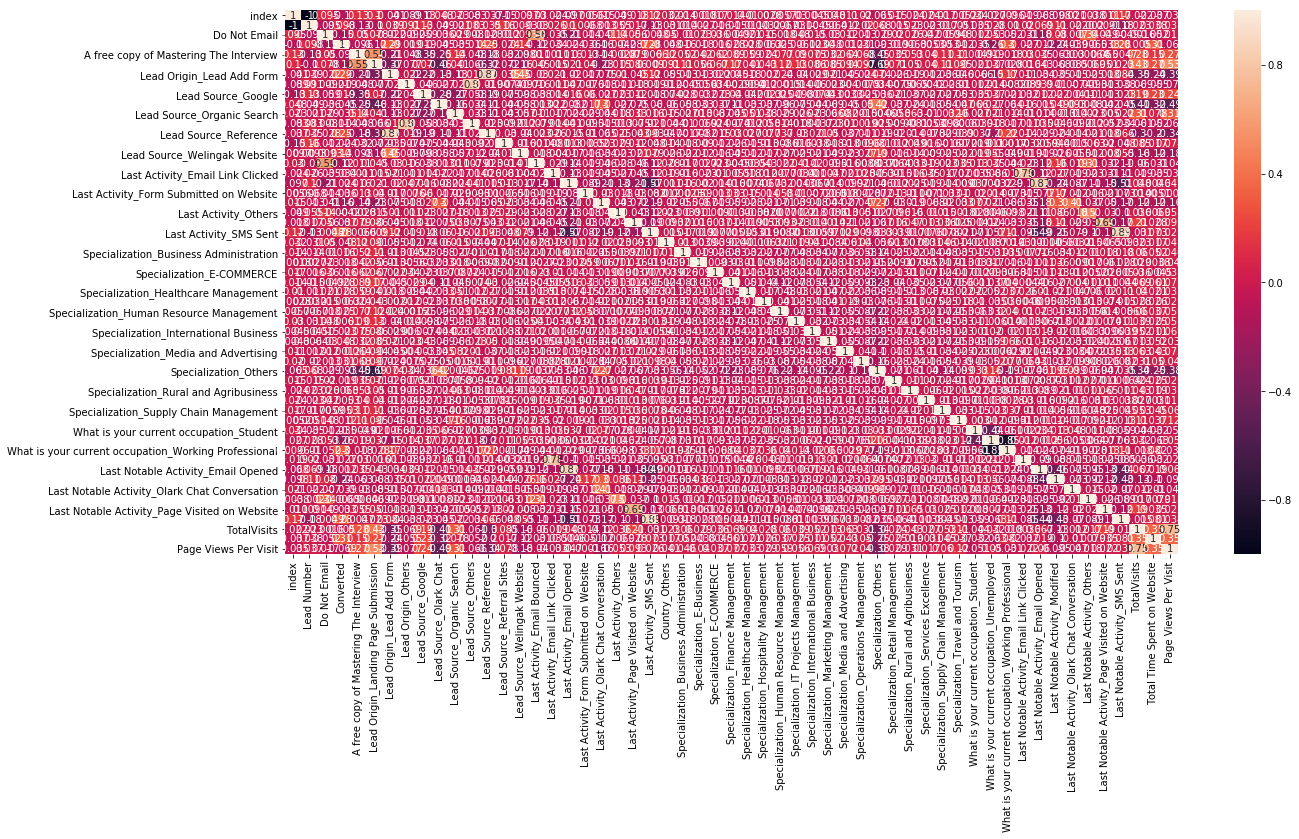

In [217]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(out_data.corr(),annot = True)

Above correlation matrix is very complecated to understand so we will use RFE with top 7 variables

## Feature Selection Using RFE

In [218]:
logreg = LogisticRegression()
rfe = RFE(logreg, 7)             # running RFE with 7 variables as output
rfe = rfe.fit(X,y)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)           # Printing the ranking

[ True False False  True False False False False False False False  True
 False False False False  True False False  True False False False False
 False False False False False False False False False False False False
 False False False False False  True False False False False  True False
 False False False False]
[ 1 18  5  1 12 25  2 29 23  9 34  1  4 22 14 32  1 15 31  1 21 28 45 38
 37 43 11 35 42 33 39 24 36  6 16 17 46 40 44  8  7  1 26 27 10 41  1 30
 13 19  3 20]


In [219]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Do Not Email', True, 1),
 ('A free copy of Mastering The Interview', False, 18),
 ('Lead Origin_Landing Page Submission', False, 5),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Others', False, 12),
 ('Lead Source_Google', False, 25),
 ('Lead Source_Olark Chat', False, 2),
 ('Lead Source_Organic Search', False, 29),
 ('Lead Source_Others', False, 23),
 ('Lead Source_Reference', False, 9),
 ('Lead Source_Referral Sites', False, 34),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 4),
 ('Last Activity_Email Link Clicked', False, 22),
 ('Last Activity_Email Opened', False, 14),
 ('Last Activity_Form Submitted on Website', False, 32),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Others', False, 15),
 ('Last Activity_Page Visited on Website', False, 31),
 ('Last Activity_SMS Sent', True, 1),
 ('Country_Others', False, 21),
 ('Specialization_Business Administration', False, 28),
 ('Specialization_E-Business', False, 4

In [220]:
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website', 'Last Activity_Olark Chat Conversation',
       'Last Activity_SMS Sent',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Others'],
      dtype='object')

In [221]:
# Let's run the model using the selected variables
logsk = LogisticRegression(C=1e9)
logsk.fit(X_train[col], y_train)

LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [222]:
#Comparing the model with StatsModels
logm4 = sm.GLM(y_train,(sm.add_constant(X_train[col])), family = sm.families.Binomial())
modres = logm4.fit()
logm4.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4476
Model:                            GLM   Df Residuals:                     4468
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2480.1
Date:                Mon, 07 Oct 2019   Deviance:                       4960.2
Time:                        23:24:10   Pearson chi2:                 4.57e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.6599      0.046    -14.441      0.000      -0.749      -0.570
Do Not Email                                            -1.8898      0.187    -10.090      0.000      -2.257      -1.523
Lead Origin_Lead Add Form                                2.3463      0.207     11.338      0.000       1.941       2.752
Lead Source_Welingak Website                             1.8129      0.748      2.424      0.015       0.347       3.279
Last Activity_Olark Chat Conversation                   -0.9816      0.167     -5.887      0.000      -1.308      -0.655
Last Activity_SMS Sent                                   1.1476      0.075     15.404      0.000       1.002       1.294
What is your current occupation_Working Professional     2.3819      0.168     14.170      0.000       2.052       2.711
Last Notable Activity_Others                             1.7411      0.292      5.953      0.000       1.168       2.314
========================================================================================================================
"""

In [223]:
X_test[col].shape

(1919, 7)

### Making Predictions

In [224]:
#scaling the test data
#X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
# Predicted probabilities
y_pred = logsk.predict_proba(X_test[col])
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred)
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]
# Let's see the head
y_pred_1.head()

,1
0,0.162
1,0.341
2,0.341
3,0.727
4,0.848


In [225]:
X_test.head()

,Do Not Email,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Others,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Country_Others,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,TotalVisits,Total Time Spent on Website,Page Views Per Visit
2147,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,-1.201,-0.948,-1.336
101,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,-1.201,-0.948,-1.336
3085,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0.600,1.355,0.072
8116,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0.240,-0.381,0.917
1434,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0.240,2.036,0.917


In [226]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Converted
2147,0
101,1
3085,1
8116,1
1434,1


In [227]:
# Putting Lead Number to index
y_test_df['Lead Number'] = y_test_df.index
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df,y_pred_1],axis=1)
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'Converted_Prob'})
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['Lead Number','Converted','Converted_Prob'], axis=1)
# Let's see the head of y_pred_final
y_pred_final.head()

,Lead Number,Converted,Converted_Prob
0,2147,0,0.162
1,101,1,0.341
2,3085,1,0.341
3,8116,1,0.727
4,1434,1,0.848


In [228]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
y_pred_final['predicted'] = y_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_pred_final.head()

,Lead Number,Converted,Converted_Prob,predicted
0,2147,0,0.162,0
1,101,1,0.341,0
2,3085,1,0.341,0
3,8116,1,0.727,1
4,1434,1,0.848,1


## Model Evaluation

In [229]:
# Confusion matrix 
confusion = metrics.confusion_matrix( y_pred_final.Converted, y_pred_final.predicted )
confusion

array([[824, 202],
       [323, 570]], dtype=int64)

In [230]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [231]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6382978723404256

In [232]:
# Let us calculate specificity
TN / float(TN+FP)

0.8031189083820662

In [233]:
# Calculate false postive rate - predicting converted when customer does not converted
print(FP/ float(TN+FP))

0.1968810916179337


In [234]:
# positive predictive value 
print (TP / float(TP+FP))

0.7383419689119171


In [235]:
# Negative predictive value
print (TN / float(TN+ FN))

0.7183958151700087


In [236]:
#Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.predicted)

0.7264200104220948

In [237]:
#Precision
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7383419689119171

In [238]:
#Recall
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6382978723404256

In [239]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

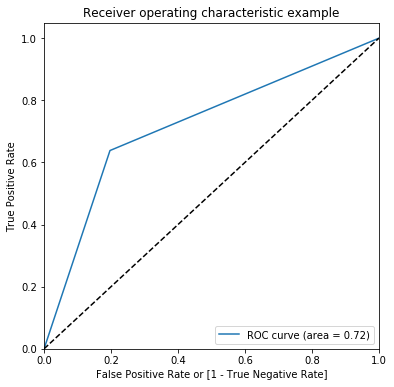

(array([0.        , 0.19688109, 1.        ]),
 array([0.        , 0.63829787, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [240]:
draw_roc(y_pred_final.Converted, y_pred_final.predicted)

In [241]:
#draw_roc(y_pred_final.Churn, y_pred_final.predicted)
"{:2.2f}".format(metrics.roc_auc_score(y_pred_final.Converted, y_pred_final.Converted_Prob))

'0.78'

## Finding Optimal Cutoff Point

In [242]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_pred_final.head()

,Lead Number,Converted,Converted_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,2147,0,0.162,0,1,1,0,0,0,0,0,0,0,0
1,101,1,0.341,0,1,1,1,1,0,0,0,0,0,0
2,3085,1,0.341,0,1,1,1,1,0,0,0,0,0,0
3,8116,1,0.727,1,1,1,1,1,1,1,1,1,0,0
4,1434,1,0.848,1,1,1,1,1,1,1,1,1,1,0


In [243]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

       prob  accuracy  sensi  speci
0.000 0.000     0.465  1.000  0.000
0.100 0.100     0.500  0.999  0.065
0.200 0.200     0.551  0.965  0.190
0.300 0.300     0.551  0.965  0.190
0.400 0.400     0.727  0.639  0.803
0.500 0.500     0.726  0.638  0.803
0.600 0.600     0.726  0.638  0.803
0.700 0.700     0.684  0.339  0.984
0.800 0.800     0.681  0.328  0.987
0.900 0.900     0.628  0.207  0.995


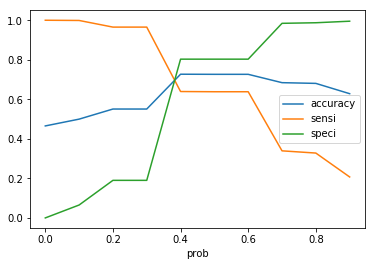

In [244]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.36 is the optimum point to take it as a cutoff probability.

In [245]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.36 else 0)

y_pred_final.head()

,Lead Number,Converted,Converted_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,2147,0,0.162,0,1,1,0,0,0,0,0,0,0,0,0
1,101,1,0.341,0,1,1,1,1,0,0,0,0,0,0,0
2,3085,1,0.341,0,1,1,1,1,0,0,0,0,0,0,0
3,8116,1,0.727,1,1,1,1,1,1,1,1,1,0,0,1
4,1434,1,0.848,1,1,1,1,1,1,1,1,1,1,0,1


In [246]:
lead_conversion = (sum(y_pred_final['final_predicted'])/len(y_pred_final['final_predicted'].index))*100
lead_conversion

40.28139656070871

In [247]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7269411151641479

In [248]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[824, 202],
       [322, 571]], dtype=int64)

In [249]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [250]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6394176931690929

In [251]:
# Let us calculate specificity
TN / float(TN+FP)

0.8031189083820662

In [252]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.1968810916179337


In [253]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7386804657179818


In [254]:
# Negative predictive value
print (TN / float(TN+ FN))

0.7190226876090751


#### Precision
TP / TP + FP

In [255]:
confusion2[1,1]/(confusion2[0,1]+confusion2[1,1])

0.7386804657179818

##### Recall
TP / TP + FN

In [256]:
confusion2[1,1]/(confusion2[1,0]+confusion2[1,1])

0.6394176931690929

In [257]:
precision_score(y_pred_final.Converted, y_pred_final.predicted)

0.7383419689119171

In [258]:
recall_score(y_pred_final.Converted, y_pred_final.predicted)

0.6382978723404256